## Introduction

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator` and set it to `GPU`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/enhanced_waste_segmentation_Detectron2/Evaluation'

LossEvalHook.py  MyTrainer.py  original_MyTrainer.py  PlotTogether.py


In [ ]:
# only if an uft-8 error occurs
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
import multiprocessing
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
cores

8

In [ ]:
!nvidia-smi

Wed Jan 17 16:06:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# **Visualisation**

In [ ]:
# Here, the previously created metrics.json including the train and validation losses during training is used to plot a loss curve.

# Set path to metrics.json for grabbing train_loss and val_loss
import json

file_metrics_path = '/content/drive/My Drive/enhanced_waste_segmentation_Detectron2/output/20240117_mask_rcnn_R_50_FPN_1x/1500_it_test_eval/metrics.json'

# List metrics
metrics_list = []

# Read every line of the file
with open(file_metrics_path, 'r') as file:
    for line in file:
        try:
            # Try to load the line as JSON
            metrics_data = json.loads(line)
            metrics_list.append(metrics_data)
        except json.JSONDecodeError as e:
            print(f"Ignoriere ungültige Zeile: {line}")

# Now we have a list of JSON objects in metrics_list

iterations = []
total_losses = []
validation_losses = []

for metric in metrics_list:
    if 'validation_loss' in metric and metric['iteration'] % 100 == 99:
        iteration = metric['iteration']
        total_loss = metric.get('total_loss', None)
        validation_loss = metric['validation_loss']

        iterations.append(iteration)
        total_losses.append(total_loss)
        validation_losses.append(validation_loss)

# Print the extracted information
for iteration, total_loss, validation_loss in zip(iterations, total_losses, validation_losses):
    print(f"Iteration: {iteration}, Total Loss: {total_loss}, Validation Loss: {validation_loss}")


Iteration: 99, Total Loss: 2.800545871257782, Validation Loss: 2.6390785401130437
Iteration: 199, Total Loss: 2.364967215806246, Validation Loss: 2.3164465042070854
Iteration: 299, Total Loss: 2.0880077444016933, Validation Loss: 1.9969018448003673
Iteration: 399, Total Loss: 1.7266112081706524, Validation Loss: 1.6523369732099316
Iteration: 499, Total Loss: 1.343179177492857, Validation Loss: 1.267733665930931
Iteration: 599, Total Loss: 1.0849967570975423, Validation Loss: 1.0368548013561285
Iteration: 699, Total Loss: 0.9609417179599404, Validation Loss: 0.9232122188624471
Iteration: 799, Total Loss: 0.9140932857990265, Validation Loss: 0.8401264296813603
Iteration: 899, Total Loss: 0.8571896739304066, Validation Loss: 0.7847090979494545
Iteration: 999, Total Loss: 0.8102593957446516, Validation Loss: 0.7409732189258842
Iteration: 1099, Total Loss: 0.7536790501326323, Validation Loss: 0.7038330964805398
Iteration: 1199, Total Loss: 0.738879606127739, Validation Loss: 0.6803261910652

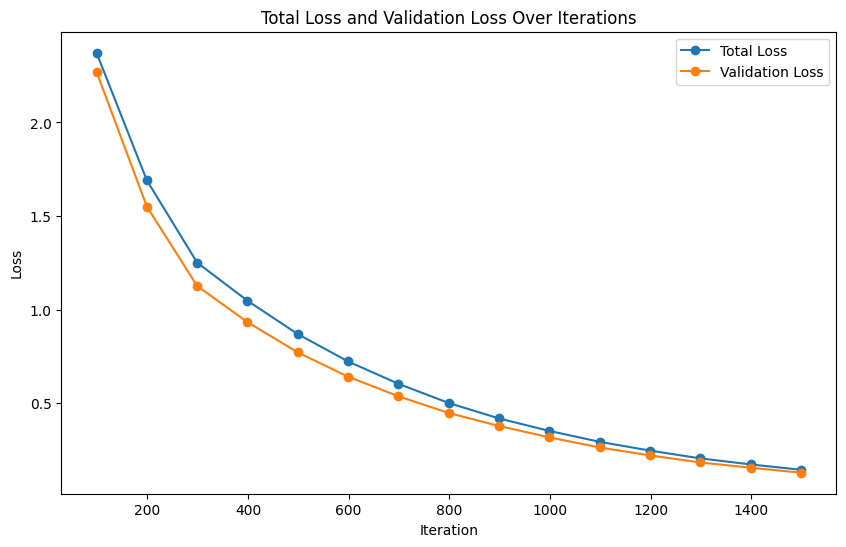

In [ ]:
import matplotlib.pyplot as plt

# Extracte information
iterations = [99, 199, 299, 399, 499, 599, 699, 799, 899, 999, 1099, 1199, 1299, 1399, 1499]
total_losses = [2.3724, 1.6908, 1.2512, 1.0476, 0.8693, 0.7231, 0.6039, 0.5012, 0.4187, 0.3521, 0.2938, 0.2471, 0.2055, 0.1732, 0.1446]
validation_losses = [2.2713, 1.5507, 1.1265, 0.9332, 0.7714, 0.6418, 0.5372, 0.4478, 0.3785, 0.3176, 0.2637, 0.2214, 0.1836, 0.1557, 0.1289]

# Create the logs list
logs = [{"iteration": iteration, "total_loss": total_loss, "validation_loss": validation_loss} for iteration, total_loss, validation_loss in zip(iterations, total_losses, validation_losses)]

# Create the diagram
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_losses, label='Total Loss', marker='')
plt.plot(iterations, validation_losses, label='Validation Loss', marker='')

# Add captions and titles
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Total Loss and Validation Loss over 1800 Iterations')
plt.legend()

# Plot diagram
plt.show()


In [ ]:
#@title Alternative Visualisation

import json

file_metrics_path = '/content/drive/My Drive/enhanced_waste_segmentation_Detectron2/output/20240117_mask_rcnn_R_50_FPN_1x/1500_it_test_eval/metrics.json'
output_file_path = '/content/drive/My Drive/enhanced_waste_segmentation_Detectron2/output/20240117_mask_rcnn_R_50_FPN_1x/1500_it_test_eval/loss_results.txt'

# list of metrics
metrics_list = []

# Read each line of the file
with open(file_metrics_path, 'r') as file:
    for line in file:
        try:
            # Try to load the line as JSON
            metrics_data = json.loads(line)
            metrics_list.append(metrics_data)
        except json.JSONDecodeError as e:
            print(f"Ignoriere ungültige Zeile: {line}")

# Now we have a list of JSON objects in metrics_list
iterations = []
total_losses = []
validation_losses = []

for metric in metrics_list:
    if 'validation_loss' in metric and metric['iteration'] % 100 == 99:
        iteration = metric['iteration']
        total_loss = metric.get('total_loss', None)
        validation_loss = metric['validation_loss']

        iterations.append(iteration)
        total_losses.append(total_loss)
        validation_losses.append(validation_loss)

# Write the extracted information to a file
with open(output_file_path, 'w') as output_file:
    for iteration, total_loss, validation_loss in zip(iterations, total_losses, validation_losses):
        output_file.write(f"Iteration: {iteration}, Total Loss: {total_loss}, Validation Loss: {validation_loss}\n")

# Print the results in the output file path
print(f"Results saved to: {output_file_path}")


Results saved to: /content/drive/My Drive/enhanced_waste_segmentation_Detectron2/output/20240117_mask_rcnn_R_50_FPN_1x/1500_it_test_eval/loss_results.txt


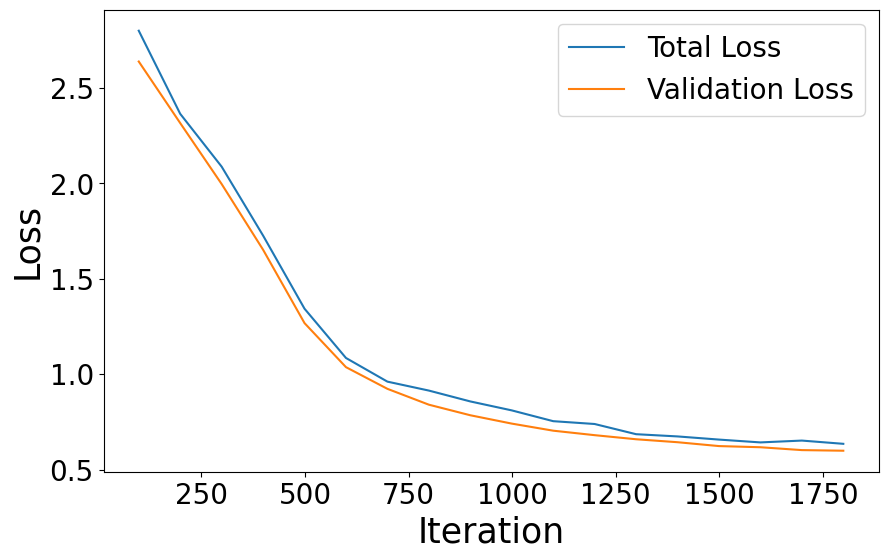

In [ ]:
# 20240117_mask_rcnn_R_50_FPN_1x/1500_it_test_eval

# Set the path to the results file
output_file_path = '/content/drive/My Drive/enhanced_waste_segmentation_Detectron2/output/20240117_mask_rcnn_R_50_FPN_1x/1500_it_test_eval/loss_results.txt'

# Load the results from the file
iterations = []
total_losses = []
validation_losses = []

with open(output_file_path, 'r') as file:
    for line in file:
        # Parse the line to extract iteration, total loss, and validation loss
        parts = line.strip().split(', ')
        iteration = int(parts[0].split(': ')[1])
        total_loss = float(parts[1].split(': ')[1])
        validation_loss = float(parts[2].split(': ')[1])

        iterations.append(iteration)
        total_losses.append(total_loss)
        validation_losses.append(validation_loss)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(iterations, total_losses, label='Total Loss', marker='')
plt.plot(iterations, validation_losses, label='Validation Loss', marker='')

# Add labels and title
plt.xlabel('Iteration', fontsize=25)
plt.ylabel('Loss', fontsize=25)
# plt.title('Total Loss and Validation Loss over 2 Iterations')
plt.legend(fontsize=20)

plt.tick_params(axis='both', labelsize=20)

# Show the plot
plt.show()
